## Importing required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils.vis_utils import plot_model
from keras.optimizers import SGD,Adam

## Importing Dataset 
### Dataset Link - [https://www.kaggle.com/code/ngbolin/mnist-dataset-digit-recognizer/data?select=train.csv]

In [2]:
# Training data
train_data=pd.read_csv('train.csv')

# Test data (scale to be in [0,1]) or normalizing data
test_data=pd.read_csv('test.csv')/255

# Dimensions of train and test data
print('Training dataframe dimensions:',train_data.shape)
print('Test dataframe dimensions:',test_data.shape)

train_data.head()

Training dataframe dimensions: (42000, 785)
Test dataframe dimensions: (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Missing values values
print('Number of null values in training data:',train_data.isnull().sum().sum())
print('Number of null values in testing data:',test_data.isnull().sum().sum())

Number of null values in training data: 0
Number of null values in testing data: 0


#### Luckily!!! There are no missing values in the dataset

## Some exploratory data analysis (EDA) on the dataset

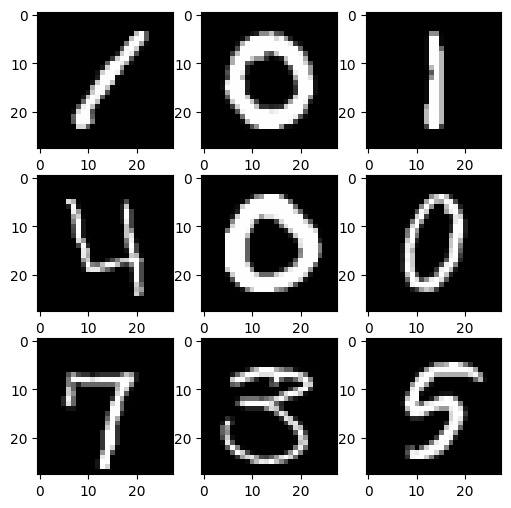

In [4]:
# Figure size
plt.figure(figsize=(6,6))

# plotting the first 9 images
for i in range(9):
    img = np.asarray(train_data.iloc[i,1:].values.reshape((28,28))/255); # making 
    ax=plt.subplot(3, 3, i+1)
    ax.grid(False)
    plt.imshow(img, cmap='gray')
    
plt.show()

Text(0.5, 1.0, 'Distribution of labels in training set')

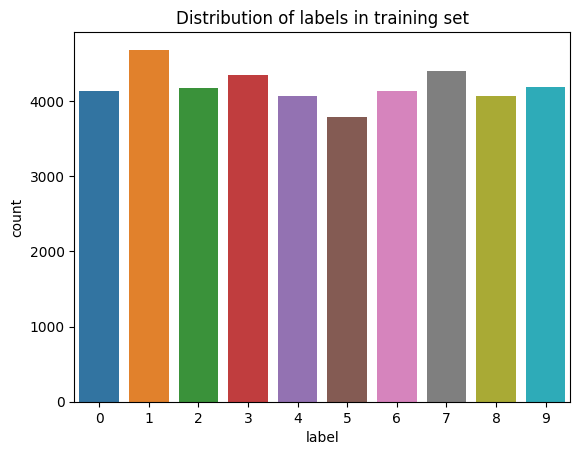

In [5]:
sns.countplot(x='label', data=train_data)
plt.title('Distribution of labels in training set')

## Preprocessing and Loading data

In [6]:
# Labels
y=train_data.label

actual = train_data.label
actual_classes = []
for i in range(len(actual)):
    actual_classes.append(actual[i])

# One-hot encoding
y=pd.get_dummies(y)

# Representation os numbers after one-hot encoding
lr = np.arange(10)
for label in range(10):
    one_hot = (lr==label).astype(int)
    print("label: ", label, " in one-hot representation: ", one_hot)

# Scale features to be in [0,1] (normalization)
X = train_data.drop('label', axis=1)/255

# deleting to save memory
del train_data

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


## Training and testing split using train_test_split() inbuild function on sklearn library

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=0, stratify=y)

## Data preperation

In [8]:
# Reshape (-1 means unspecified)
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_valid = X_valid.values.reshape(-1, 28, 28, 1)

# Saving the image id to test_index instance for our output
X_index = X.index  

# Reshape
X = X.values.reshape(-1, 28, 28, 1)

# Saving the image id to test_index instance for our output
test_index = test_data.index  

# Reshape
test_data = test_data.values.reshape(-1, 28, 28, 1)

model_type= []
model_score = []

## LeNet :
LeNet is the most popular CNN architecture it is also the first CNN model which came in the year 1998. LeNet was originally developed to categorise handwritten digits from 0–9 of the MNIST Dataset. It is made up of seven layers, each with its own set of trainable parameters. It accepts a 32 × 32 pixel picture, which is rather huge in comparison to the images in the data sets used to train the network. RELU is the activation function that has been used. The layers are laid out in the following order:

1. The First Convolutional Layer is made up of 6 5 X 5 filters with a stride of 1.
2. The Second Layer is a 2 X 2 average-pooling or "sub-sampling" layer with a stride of 2.
3. The Third Layer is similarly a Convolutional layer, with 16 ,5 X 5 filters and a stride of 1.
4. The Fourth Layer is another 2 X 2 average-pooling layer with a stride of 2.
5. The fifth layer is basically connecting the output of the fourth layer with a fully connected layer consisting of 120 nodes.
6. The Sixth Layer is a similarly fully-connected layer with 84 nodes that derives from the outputs of the Fifth Layer's 120 nodes.
7. The seventh layer consists of categorising the output of the previous layer into ten classifications based on the 10-digits it was trained to identify.

It was one of the first effective digit-recognition algorithms for classifying handwritten digits. However, this network was ineffective in terms of computing cost and accuracy when it came to processing huge images and categorising among a large number of object classes.

In [9]:
# Setting up LeNet Model
def LeNet(opt):
    model = Sequential()

    # Convolutional layer  
    model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu', input_shape = (28,28,1), strides=(1, 1)))

    # Max-pooing layer with pooling window size is 2x2
    model.add(MaxPool2D(pool_size = (2,2), strides=(2, 2)))

    # Convolutional layer 
    model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu', strides=(1, 1)))

    # Max-pooling layer 
    model.add(MaxPool2D(pool_size = (2,2), strides=(2, 2)))

    # Flatten layer 
    model.add(Flatten())

    # The first fully connected layer 
    model.add(Dense(120, activation = 'relu'))
    
    # The second fully connected layer
    model.add(Dense(84, activation = 'relu'))

    # The output layer  
    model.add(Dense(10, activation = 'softmax'))

    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    # Model summary
    model.summary()

    return model

## Customized CNN :

Convolutional Neural Networks (CNNs) are a type of Neural Network that has excelled in a number of contests involving Computer Vision and Image Processing. Image Classification and Segmentation, Object Detection, Video Processing, Natural Language Processing, and Speech Recognition are just a few of CNN's fascinating application areas. Deep CNN's great learning capacity is due to the utilisation of many feature extraction stages that can learn representations from data automatically.

The capacity of CNN to utilise spatial or temporal correlation in data is one of its most appealing features. CNN is separated into numerous learning stages, each of which consists of a mix of convolutional layers, nonlinear processing units, and subsampling layers. CNN is a feedforward multilayered hierarchical network in which each layer conducts several transformations using a bank of convolutional kernels. The convolution procedure aids in the extraction of valuable characteristics from data points that are spatially connected.

In [10]:
# Setting up the CNN Model
def CNN(opt):
    model = Sequential()


    # Convolution layer 1 -> Pooling layer 1
    model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (28,28,1)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Convolution layer 2 -> Pooling layer 2
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    # Hidden Layer
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(10, activation = "softmax"))
    
    # Defining optimizer, loss function and accuracy metric
    model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Model summary
    model.summary()
    
    return model

In [11]:
def plot_loss_and_accuracy(model):
    accuracy = model.history['accuracy']
    loss = model.history['loss']
    validation_loss = model.history['val_loss']
    validation_accuracy = model.history['val_accuracy']

    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1)
    plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
    plt.plot(range(len(accuracy)), validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Accuracy : Training Vs Validation ')


    plt.subplot(2, 2, 2)
    plt.plot(range(len(accuracy)), loss, label='Training Loss')
    plt.plot(range(len(accuracy)), validation_loss, label='Validation Loss')
    plt.title('Loss : Training Vs Validation ')
    plt.legend(loc='upper right')
    plt.show()

def train_model(model, X_train, y_train, X_test, y_test, epochs = 6, batch_size = 128):
    
    # Fitting the model on the training set
    history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, 
                      steps_per_epoch = X_train.shape[0]//batch_size, 
                      validation_data = (X_test, y_test), 
                      validation_steps = X_test.shape[0]//batch_size, verbose = 1)

    # evaluating the model
    _, acc = model.evaluate(X_test, y_test, verbose = 1)
    
    print('\nAccuracy of the model is : %.3f' % (acc * 100.0))

    model_score.append(acc*100.0)
    
    plot_loss_and_accuracy(history)
    
    return history

## Creating Models and Pre-viewing their summary

In [12]:
print("LeNet_sgd Model : \n")
model_type.append("LeNet with sgd")
LeNet_sgd_model = LeNet('sgd')
print("\n")

print("LeNet_Adam Model : \n")
model_type.append("LeNet with Adam")
LeNet_Adam_model = LeNet('adam')
print("\n")

print("CNN_sgd Model : \n")
model_type.append("CNN with sgd")
cnn_sgd_model = CNN('sgd')
print("\n")

print("CNN_Adam Model : \n")
model_type.append("CNN with Adam")
cnn_adam_model = CNN('adam')

LeNet_sgd Model : 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 

## Models Training and Evaluation (LeNet_sgd, LeNet_Adam, CNN_sgd, CNN_Adam)

LeNet_sgd Model Training and Evaluation : 

Epoch 1/6
262/262 [==============================] - 8s 19ms/step - loss: 2.0532 - accuracy: 0.3861 - val_loss: 1.1248 - val_accuracy: 0.7171
Epoch 2/6
262/262 [==============================] - 5s 17ms/step - loss: 0.5803 - accuracy: 0.8357 - val_loss: 0.3859 - val_accuracy: 0.8825
Epoch 3/6
262/262 [==============================] - 4s 16ms/step - loss: 0.3174 - accuracy: 0.9052 - val_loss: 0.2691 - val_accuracy: 0.9175
Epoch 4/6
262/262 [==============================] - 4s 16ms/step - loss: 0.2418 - accuracy: 0.9262 - val_loss: 0.2188 - val_accuracy: 0.9317
Epoch 5/6
262/262 [==============================] - 4s 15ms/step - loss: 0.2056 - accuracy: 0.9388 - val_loss: 0.1842 - val_accuracy: 0.9409
Epoch 6/6
263/263 [==============================] - 2s 7ms/step - loss: 0.1609 - accuracy: 0.9496

Accuracy of the model is : 94.964


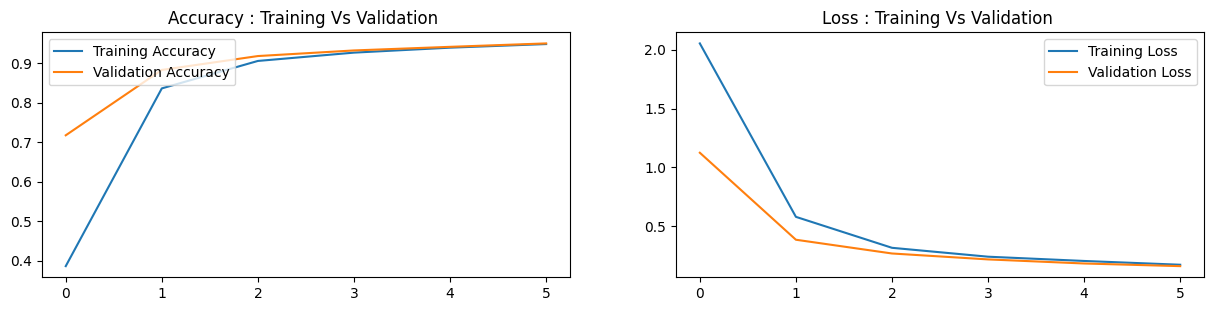




LeNet_Adam model Training and Evaluation : 

Epoch 1/6
262/262 [==============================] - 5s 17ms/step - loss: 0.4406 - accuracy: 0.8712 - val_loss: 0.1650 - val_accuracy: 0.9476
Epoch 2/6
262/262 [==============================] - 4s 16ms/step - loss: 0.1114 - accuracy: 0.9664 - val_loss: 0.0970 - val_accuracy: 0.9679
Epoch 3/6
262/262 [==============================] - 4s 16ms/step - loss: 0.0771 - accuracy: 0.9763 - val_loss: 0.0694 - val_accuracy: 0.9785
Epoch 4/6
262/262 [==============================] - 4s 16ms/step - loss: 0.0622 - accuracy: 0.9803 - val_loss: 0.0578 - val_accuracy: 0.9811
Epoch 5/6
262/262 [==============================] - 4s 16ms/step - loss: 0.0509 - accuracy: 0.9845 - val_loss: 0.0524 - val_accuracy: 0.9832
Epoch 6/6
263/263 [==============================] - 2s 7ms/step - loss: 0.0636 - accuracy: 0.9798

Accuracy of the model is : 97.976


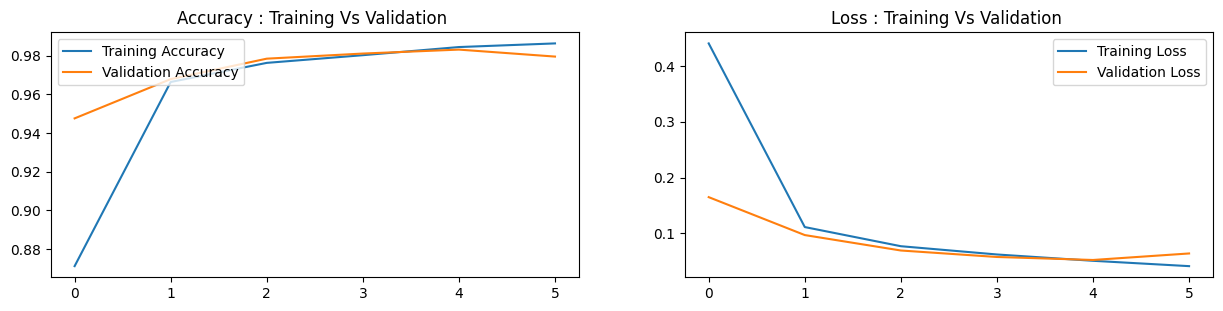




CNN_sgd model Training and Evaluation : 

Epoch 1/6
262/262 [==============================] - 14s 49ms/step - loss: 1.7614 - accuracy: 0.4145 - val_loss: 0.7316 - val_accuracy: 0.8231
Epoch 2/6
262/262 [==============================] - 12s 46ms/step - loss: 0.7781 - accuracy: 0.7465 - val_loss: 0.4169 - val_accuracy: 0.8894
Epoch 3/6
262/262 [==============================] - 13s 50ms/step - loss: 0.5653 - accuracy: 0.8227 - val_loss: 0.3225 - val_accuracy: 0.9096
Epoch 4/6
262/262 [==============================] - 14s 53ms/step - loss: 0.4561 - accuracy: 0.8580 - val_loss: 0.2687 - val_accuracy: 0.9219
Epoch 5/6
262/262 [==============================] - 14s 53ms/step - loss: 0.3892 - accuracy: 0.8790 - val_loss: 0.2320 - val_accuracy: 0.9355
Epoch 6/6
263/263 [==============================] - 4s 13ms/step - loss: 0.2005 - accuracy: 0.9423

Accuracy of the model is : 94.226


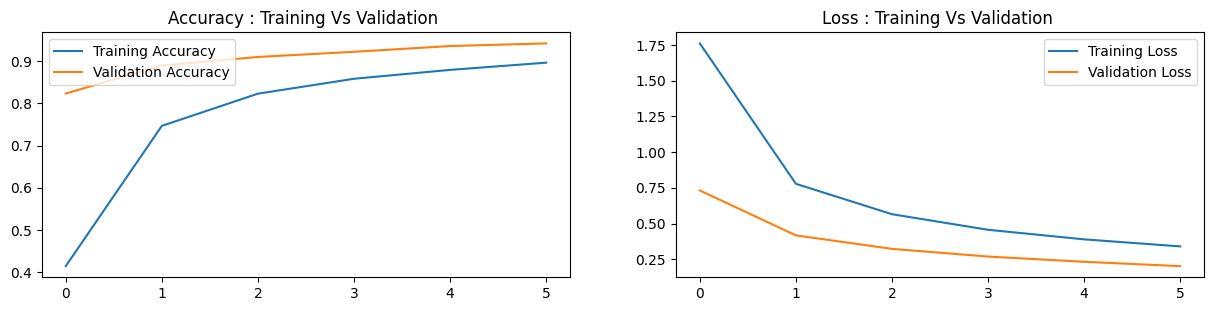




CNN_Adam model Training and Evaluation : 

Epoch 1/6
262/262 [==============================] - 18s 66ms/step - loss: 0.3640 - accuracy: 0.8853 - val_loss: 0.0840 - val_accuracy: 0.9738
Epoch 2/6
262/262 [==============================] - 16s 60ms/step - loss: 0.1074 - accuracy: 0.9666 - val_loss: 0.0581 - val_accuracy: 0.9822
Epoch 3/6
262/262 [==============================] - 20s 78ms/step - loss: 0.0785 - accuracy: 0.9760 - val_loss: 0.0446 - val_accuracy: 0.9858
Epoch 4/6
262/262 [==============================] - 16s 61ms/step - loss: 0.0664 - accuracy: 0.9796 - val_loss: 0.0401 - val_accuracy: 0.9870
Epoch 5/6
262/262 [==============================] - 17s 64ms/step - loss: 0.0528 - accuracy: 0.9833 - val_loss: 0.0360 - val_accuracy: 0.9883
Epoch 6/6
263/263 [==============================] - 3s 12ms/step - loss: 0.0327 - accuracy: 0.9889

Accuracy of the model is : 98.893


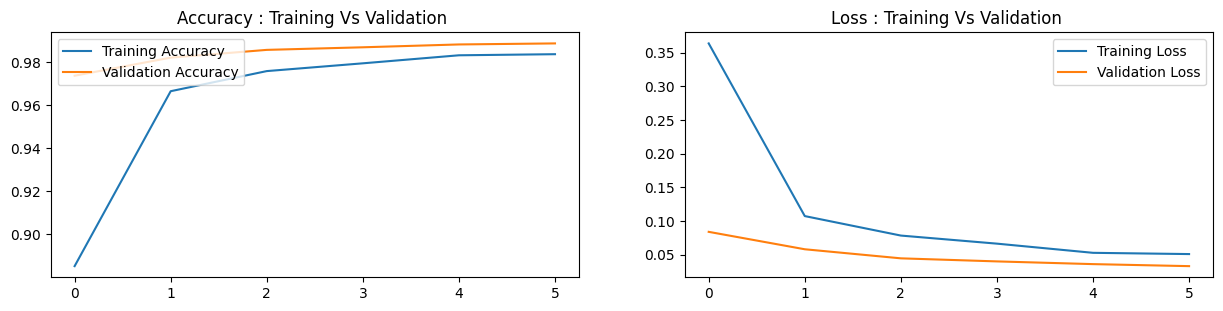

In [13]:
print("LeNet_sgd Model Training and Evaluation : \n")
train_model(LeNet_sgd_model, X_train, y_train, X_valid, y_valid)
print("\n\n")

print("LeNet_Adam model Training and Evaluation : \n")
train_model(LeNet_Adam_model, X_train, y_train, X_valid, y_valid)
print("\n\n")

print("CNN_sgd model Training and Evaluation : \n")
train_model(cnn_sgd_model, X_train, y_train, X_valid, y_valid)
print("\n\n")

print("CNN_Adam model Training and Evaluation : \n")
train_model(cnn_adam_model, X_train, y_train, X_valid, y_valid)

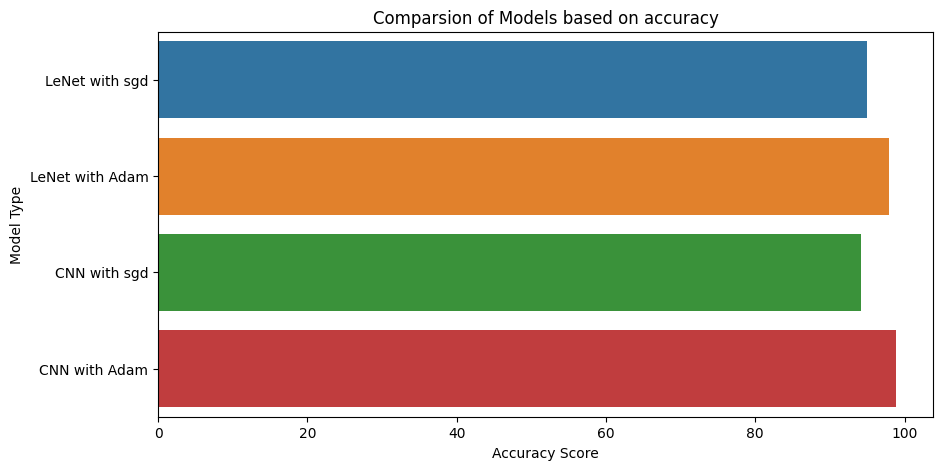

In [14]:
plt.subplots(figsize=(10,5))
sns.barplot(x = model_score , y = model_type)
plt.title("Comparsion of Models based on accuracy")
plt.xlabel("Accuracy Score")
plt.ylabel("Model Type")
plt.show()

#### For low response time: LeNet with Adam optimizer model is best and for high accuracy rate: CNN with Adam optimizer model is best 
#### The final model that i choose based on accuracy is *** CNN with Adam model *** 

## Predictions on train and test data using the final model

In [15]:
preds = cnn_adam_model.predict(X) # logits of classes (prob. == argmax(logits))

pred_classes = np.argmax(preds,axis=1)

# Saving Predicted output of train data to a data frame named output output_train_data
output_train_data = pd.DataFrame({'ImageId': X_index+1, 'Actual Label': actual_classes, 'Predicted Label': pred_classes})

# Printng first five rows of predicted output on train data
output_train_data.head()

1313/1313 [==============================] - 7s 5ms/step


,ImageId,Actual Label,Predicted Label
0,1,1,1
1,2,0,0
2,3,1,1
3,4,4,4
4,5,0,0


In [16]:
preds = cnn_adam_model.predict(test_data) # logits of classes (prob. == argmax(logits))

pred_classes = np.argmax(preds,axis=1)

# Saving Predicted output of train data to a data frame named output output_test_data
output_test_data = pd.DataFrame({'ImageId': test_index+1, 'Predicted Label': pred_classes})

# Printng first five rows of predicted output on test data
output_test_data.head()

875/875 [==============================] - 6s 7ms/step


,ImageId,Predicted Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


## Saving the predicted outputs on train and test data in Output_train.csv, Output_test.csv files respectively

In [17]:
output_train_data.to_csv('Output_train.csv', index=False)

In [18]:
output_test_data.to_csv('Output_test.csv', index=False)

## Opening the saved csv files in excel to check the predicted outputs

In [19]:
os.startfile('Output_train.csv')
os.startfile('Output_test.csv')